## The Presence of Heart Disease

**Introduction:** 

"Heart disease” refers to several types of heart conditions that can affect the operations of the heart muscle. These can include; blood vessel disease, coronary artery disease, Heart rhythm problems, congenital heart defects, heart valve disease, disease of the heart muscle and heart infection. The most common of these is coronary artery disease, which affects the blood flow to the heart that can result in heart attacks and heart failure. Heart disease is a leading cause of death for men, women or most racial and ethnics groups around the world. One person dies every 36 seconds in the USA from a cardiovascular disease. Risk of heart disease can be influenced by many factors including, age, high blood pressure, and high blood cholesterol levels. Growing older increases your risk of damaged and narrowed arteries and a weakened or thickened heart muscle, therefore, individuals older in age are more likely to have heart disease. High blood cholesterol can increase the risk of plaque formation and atherosclerosis and in turn increase the likelihood of heart disease in an individual. Moreover, uncontrolled high blood pressure can result in hardening and thickening of your arteries, narrowing the vessels through which blood flows, increasing an individual's likelihood of having heart disease. Additionally, important symptoms to notice in individuals who have heart disease are the type of chest pain they are having, as angina is chest pain or discomfort caused when your heart muscle doesn't get enough oxygen-rich blood(feels like pressure or squeezing in your chest) and is a major symptom of heart disease. Furthermore, angina chest pain along with irregular heartbeats in an individual can strongly indicate that they might have heart disease. 

Due to age, high blood pressure, high cholesterol being major risk factors of heart disease and the type of chest pain along with irregular heart beats being an important symptom of heart disease we decided that these factors would best predict the presence of heart disease in an individual. Our question is as follows:

**Can we use the age, blood pressure, and cholesterol levels, type of chest pain and heart rate of an individual to predict whether or not they have heart disease?**
 
This dataset shows information about several individuals that could contribute to heart disease, like blood pressure, chest pain, age, sex, blood sugar, heart rate, e.t.c, and whether or not they have heart disease. The goal of this database is to determine the presence of heart disease in a patient. This goal is represented by the POHD field, which refers to the presence of heart disease in an individual. It is an integer valued from 0 (no presence) to 4. Experiments with this database have focused on distinguishing presence of heart disease (a value from 1 through 4) from absence (0). In this database, sex is represented by integer values, with 0 representing female and 1 representing male. The serum_cholestoral field represents serum cholesterol in mg/dl. The chest_pain_type field is represented by integer values ranging from 1-4. A value of 1 indicates typical angina, 2 is atypical angina, 3 is non-anginal pain, and 4 is asymptomatic. 


***Load all libraries needed for data analysis**

It is important that you load all the libraries below inorder to ensure that all of the functions needed to preform the data analysis for heart disease are loaded into tidyverse. 

In [1]:
#load_libraries
library(tidyverse)
library(tidymodels)
library(repr)
library(readxl)
library(testthat)
library(digest)
library(cowplot)
library(GGally)

options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

**1) Load data for analysis**

Below we have read in all the datasets available to us, using the same source of collecting this information, we then combined them together creating a larger data set with more data to use in our analysis. In each data set we converted the NA's in each column to question marks, to ensure that our data is usable and that our analysis does not lead to major errors. Additionally we created informative and readable column names to be able to determine what each comlumn represents and which column should be kept for our data analysis. 

In [2]:
set.seed(1234)
#We have read in and combined all datasets and tidied the data. 
#The NAs in the datasets are replaced with question marks.

cleveland_url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
hungary_url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data"
switzerland_url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data"
va_url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data"

cleveland_data <- read_csv(cleveland_url, col_names = FALSE, na = "?")
hungary_data <- read_csv(hungary_url, col_names = FALSE, na = "?")
switzerland_data <- read_csv(switzerland_url, col_names = FALSE, na = "?")
va_data <- read_csv(va_url, col_names = FALSE, na = "?")

heart_disease_data1 <- full_join(cleveland_data, hungary_data) %>%
    full_join(switzerland_data) %>%
    full_join(va_data)

colnames(heart_disease_data1) <- c("Age", "Sex", "chest_pain_type", "resting_blood_pressure", "serum_cholestorol", "fasting_blood_sugar", "resting_electrocardiographic_results",
                "maximum_heart_rate" , "exercise_induced_angina" , "oldpeak" , "slope" , "ca" , "thal" , "POHD")

head(heart_disease_data1)

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double(),
  X10 = col_double(),
  X11 = col_double(),
  X12 = col_double(),
  X13 = col_double(),
  X14 = col_double()
)

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double(),
  X10 = col_double(),
  X11 = col_double(),
  X12 = col_double(),
  X13 = col_double(),
  X14 = col_double()
)

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double(),
  X10 = col_double(),
  X11 = col_double(),
  X12 = col_double(),
  X13 = col_double(),
 

Age,Sex,chest_pain_type,resting_blood_pressure,serum_cholestorol,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate,exercise_induced_angina,oldpeak,slope,ca,thal,POHD
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
56,1,2,120,236,0,0,178,0,0.8,1,0,3,0


**2) Clean and wrangle data into a tidy format that can be used for the analysis**

In our data set, the presence of heart disease column (POHD) has been mutated with the purpose of  distinguishing the presence of heart disease (positive) from lack of heart disease (negative). We then selected the desired columns for our analysis which include; the factors we wish to use for our classification(age, chest pain type, serum cholesterol levels, resting blood pressure, maximum heart rate) along with the column we are trying to predict which is the presence of heart disease. We then remove the NA's in our data in order to clean the data to make it usable for our data analysis.

In [3]:
set.seed(1234)

POHD2 <- mutate(heart_disease_data1, Presence_of_Heart_Disease = ifelse(POHD>0, "P", "N"))

#select for desired columns
heart_data <- POHD2 %>%
                    select(Age, chest_pain_type, serum_cholestorol, Presence_of_Heart_Disease, resting_blood_pressure, maximum_heart_rate) %>%
                    mutate(Presence_of_Heart_Disease = as_factor(Presence_of_Heart_Disease))
#remove NAs
heart_disease_data1 <- na.omit(heart_data)
heart_disease_data1

Age,chest_pain_type,serum_cholestorol,Presence_of_Heart_Disease,resting_blood_pressure,maximum_heart_rate
<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
63,1,233,N,145,150
67,4,286,P,160,108
67,4,229,P,120,129
⋮,⋮,⋮,⋮,⋮,⋮
54,4,333,P,127,154
55,4,223,P,122,100
62,2,254,P,120,93


**3) Split data into testing or training data**

Below we have set the seed when splitting our data to ensure that it is reproducible. We then split our data into training and testing data to ensure that we can determine how accurate our model is.

In [4]:
set.seed(1234)


heart_disease_split <- initial_split(heart_disease_data1, prop = 0.70, strata = Presence_of_Heart_Disease)
heart_disease_train <- training(heart_disease_split)
heart_disease_test <- testing(heart_disease_split)

heart_disease_train

Age,chest_pain_type,serum_cholestorol,Presence_of_Heart_Disease,resting_blood_pressure,maximum_heart_rate
<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
63,1,233,N,145,150
67,4,286,P,160,108
67,4,229,P,120,129
⋮,⋮,⋮,⋮,⋮,⋮
46,4,310,P,134,126
54,4,333,P,127,154
55,4,223,P,122,100


**4) Summarize the data into tables that are relevant to our analysis**

Below we have summarized our data into two tables. The first table below summarizes the total number of variables corresponding to positive and negative heart disease in our data. The second table summarizes the average of each column that we are using in our data analysis.


In [5]:
#useful Tables 
set.seed(1234)


summerized_POHD <- heart_disease_train %>%
    group_by(Presence_of_Heart_Disease) %>%
    summarize("Number of variable"= n()) 

mean_variables <- summarize(heart_disease_train,
                           "Mean Age" = mean(Age),
                           "Mean serum cholestoral" = mean(serum_cholestorol),
                           "Mean Chest Pain Type" = mean(chest_pain_type),
                           "Mean Resting Blood Pressure" = mean(resting_blood_pressure), 
                           "Mean maximum heart rate" = mean(maximum_heart_rate)) 
summerized_POHD
mean_variables

`summarise()` ungrouping output (override with `.groups` argument)



Presence_of_Heart_Disease,Number of variable
<fct>,<int>
N,262
P,323


Mean Age,Mean serum cholestoral,Mean Chest Pain Type,Mean Resting Blood Pressure,Mean maximum heart rate
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
52.78291,197.2325,3.261538,131.3744,137.9812


The first table shows the number of rows that correspond to positive and negative POHD values. We can use this summary to see that we have similar numbers of positive and negative values for heart disease presence; therefore, upsampling is not needed. 

The second table shows the mean values of our predictors, which can be useful in determining the average of each factor in the population. This can allow you to make the inference that if an individual's observations greatly differ from the averages of the population that they may be at a greater risk of heart disease. 

**5) Created a recipe and scaled our data**

Below we created a recipe for our data and scaled our predictors to make sure that they were of equal importance when performing our data analysis. We then applied this recipe to our data set.

In [1]:
#scaled Data 
set.seed(1234)


heart_disease_recipe <- recipe(Presence_of_Heart_Disease ~ Age + serum_cholestorol + chest_pain_type + resting_blood_pressure + maximum_heart_rate, data = heart_disease_train ) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors()) 
heart_disease_scaled <- heart_disease_recipe %>%
        prep() %>%
        bake(heart_disease_train)
heart_disease_scaled

ERROR: Error in recipe(Presence_of_Heart_Disease ~ Age + serum_cholestorol + : could not find function "%>%"


**6) Created visualization of our analyis**

Below we created histograms to visulize the relationship between our factors and the presence of heart disease in an individual. 

In [1]:
options(repr.plot.width = 17, repr.plot.height = 15)
set.seed(1234)


plot_a <- heart_disease_train %>%
    ggplot(aes(x = Age, fill = Presence_of_Heart_Disease)) + 
    geom_histogram(position = 'fill', color = "black", bins = 25) + 
    xlab("Age") +
    ylab("Frequency") +
    labs(fill = "Presence of Heart Disease") +
    ggtitle("Age and Heart Disease") 

plot_b <- heart_disease_train %>%
   ggplot(aes(x = serum_cholestorol, fill = Presence_of_Heart_Disease)) + 
   geom_histogram(position = 'fill', color = "black", bins = 25) + 
   xlab("Cholesterol") +
   ylab("Frequency") +
   labs(fill = "Presence of Heart Disease") +
   ggtitle("Cholesterol and Heart Disease") 

plot_c <- heart_disease_train %>%
   ggplot(aes(x = maximum_heart_rate, fill = Presence_of_Heart_Disease)) + 
   geom_histogram(position = 'fill', color = "black", bins = 25) + 
   xlab("Heart Rate") +
   ylab("Frequency") +
   labs(fill = "Presence of Heart Disease") +
   ggtitle("Heart Rate and Heart Disease") 

plot_d <- heart_disease_train %>%
   ggplot(aes(x = chest_pain_type, fill = Presence_of_Heart_Disease)) + 
   geom_histogram(position = 'fill', color = "black", bins = 25) + 
   xlab("Chest Paint Type") +
   ylab("Frequency") +
   labs(fill = "Presence of Heart Disease") +
   ggtitle("Chest Pain Type and Heart Disease") 

plot_e <- heart_disease_train %>%
   ggplot(aes(x = resting_blood_pressure, fill = Presence_of_Heart_Disease)) + 
   geom_histogram(position = 'fill', color = "black", bins = 25) + 
   xlab("Chest Pain Type") +
   ylab("Frequency") +
   labs(fill = "Presence of Heart Disease") +
   ggtitle("Resting Blood Pressure and Heart Disease") 


plot_grid(plot_a, plot_b, plot_c, plot_d, plot_e)

ERROR: Error in heart_disease_train %>% ggplot(aes(x = Age, fill = Presence_of_Heart_Disease)): could not find function "%>%"


**_Interpretations_**

Histograms are used to visualize our data. These graphs show the relationship between our predictors and presence of heart disease. This lets us clearly see how each predictor impacts risk of heart disease. The predictor values have been scaled to ensure that all observations will be on a comparable scale. The plots show that age, cholesterol, and heart rate are good predictors.


# Data Analysis 

**1) Perform  K-Nearest Neighbors Classification steps**

a) Created a nearest_neighbors model specification, with neighbors = tune() to be able to determine which value of k creates the most accurate model and weight_func = "rectangular" as the model we want to fit.

b) Split out overall training data into evenly-sized validation sets used to evaluate the best k value. We used 5 folds for our evaluation which is enough to get an accuracy estimate and reasonable computation time. 

c) Using the tibble function we created a data frame with a neighbors variable that contains the sequence of values of k to try. Here we are testing values from 1-30 (This gives a wide range of values to test, but still allows the program to run at a reasonable speed.)

d) Added model and recipe to a workflow

i) Used tune_grid function to fit the model for a range of values, and in the grid argument, we specified the range of k values that we pre-determined in step c.

ii) Used the collect_metrics function to aggregate the mean and standard error of the classifiers validation accuracy across the folds.

iii) when then filter for the accuracy listed under the .metric column

**We have created a table below with the k values and their accuracies in order for us to determine which k value to use.**


In [8]:
# a) created a nearest_neighbor model
set.seed(1234)


knn_model <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
    set_engine("kknn") %>%
    set_mode("classification")

#b created a validation sets
heart_disease_vfold <- vfold_cv(heart_disease_train, v=5, strata = Presence_of_Heart_Disease)
                              
#c creating a data table with possible k values
k_vals <- tibble(neighbors = seq(from=1, to=30))

#d these steps together in a workflow and compute the accuracy of 
Heart_disease_predictions <- workflow() %>%
    add_recipe(heart_disease_recipe) %>%
    add_model(knn_model) %>%
    tune_grid(resample = heart_disease_vfold, grid = k_vals) %>%
    collect_metrics() %>% 
    filter(.metric == "accuracy")

Heart_disease_predictions

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.7093845,5,0.004819086,Model01
2,accuracy,binary,0.7093845,5,0.004819086,Model02
3,accuracy,binary,0.7452552,5,0.005422014,Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
28,accuracy,binary,0.7845445,5,0.0170858,Model28
29,accuracy,binary,0.7811109,5,0.0188203,Model29
30,accuracy,binary,0.7811109,5,0.0188203,Model30


**_2) We now need to pick the best k value to use in our data analysis_**

**below is a graph of the possible k values against the accuracy of each one**

We can visually determine from this graph that the k value with the most accuracy is roughly between 11 and 12.
 

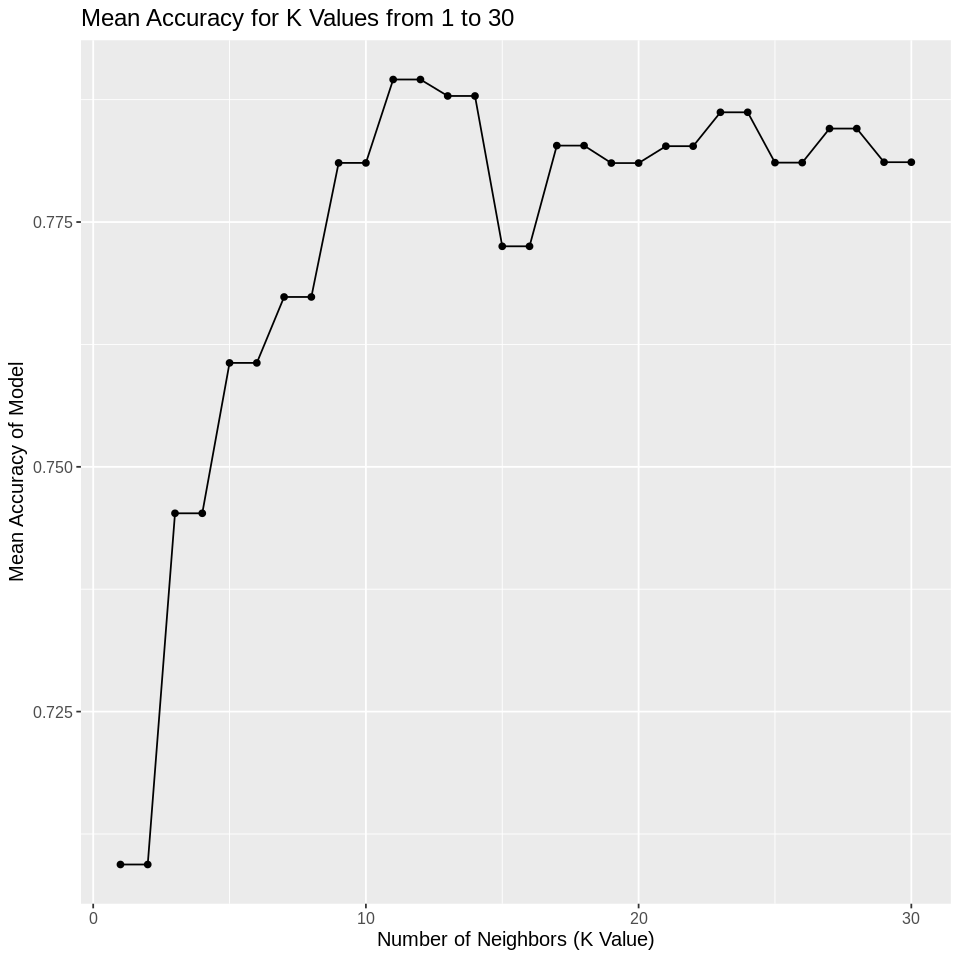

In [9]:
options(repr.plot.width = 8, repr.plot.height = 8)
set.seed(1234)


k_value_plot <- Heart_disease_predictions %>%
ggplot(aes(x=neighbors, y=mean)) +
geom_point()+
geom_line()+
labs(x="Number of Neighbors (K Value)", y="Mean Accuracy of Model")+
ggtitle("Mean Accuracy for K Values from 1 to 30")+
theme(text=element_text(size=12))
k_value_plot

Using the code below we arrange the k values in descending order of their mean value, this arranges the k values with the highest accuracy at the top where we can slice and pull the desired value.

In [10]:
#picking best k value
set.seed(1234)


best_k_value <- Heart_disease_predictions %>%
    arrange(desc(mean)) %>%
    slice(1)%>%
    pull(neighbors)

best_k_value

[1] 11

We can also use code to determine the accuracy of the best value of k. We do this by filtering for the desired k value row and then pulling the mean value and multiplying it by 100 to make it a percent.

In [12]:
#accuracy of k value
set.seed(1234)


mean_accuracy_best_k <- Heart_disease_predictions %>%
    filter(neighbors == best_k_value)%>%
    pull(mean)*100

mean_accuracy_best_k

[1] 78.9556

**2) Make a new model specification for the best parameter value k, and retrain the classifier using the fit function. **

Model Specification with the best value of $K$ 

In [14]:
#create model
set.seed(1234)


#recipe 
heart_disease_recipe <- recipe(Presence_of_Heart_Disease ~ Age + serum_cholestorol + chest_pain_type + resting_blood_pressure + maximum_heart_rate, data = heart_disease_train ) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors()) 
heart_disease_scaled <- heart_disease_recipe %>%
        prep() %>%
        bake(heart_disease_train) 

#model

knn_best_model <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k_value) %>%
    set_engine("kknn")%>%
    set_mode("classification") 

#pass the model specification and the training data set to the fit() function. 
heart_disease_fit <- workflow() %>%
    add_recipe(heart_disease_recipe) %>%
    add_model(knn_best_model) %>%
    fit(heart_disease_train)

heart_disease_fit 


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~best_k_value,     kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2188034
Best kernel: rectangular
Best k: 11

In [17]:
#Evalute accuracy
set.seed(1234)
heart_disease_testing_model <- heart_disease_fit %>%
    predict(heart_disease_test) %>%
    bind_cols(heart_disease_test) %>%
    metrics(truth = Presence_of_Heart_Disease, estimate = .pred_class) %>%
    filter(.metric == "accuracy")

percent_accuracy <- heart_disease_testing_model%>%
    pull(.estimate)*100
percent_accuracy

[1] 79.91968

Predicting on test dataset and report accuracy and confusion matrix

In [22]:
set.seed(1234)


heart_predictions <- predict(heart_disease_fit, heart_disease_test) %>%
      bind_cols(heart_disease_test)

heart_conf_mat <- heart_predictions %>%
        conf_mat(truth = Presence_of_Heart_Disease, estimate = .pred_class)    
heart_conf_mat

          Truth
Prediction   N   P
         N  83  22
         P  28 116

**Visualization of Analysis**

After predicting and analyzing our data, we now have our confusion matrix, which shows us the number of correctly predicted classifications per type. This confusion matrix is theoretically a visualization method that tells us our accuracy and resulting answer, but it is an ineffective visualization method that has hard for humans to discern and understand, and difficult to manipulate as data seeing as it is not a tidy dataframe.

The following code is a written function that produces and wrangles the prediction data in such a way, that it returns two tidy dataframes with data within those dataframes being nearly identical to the data shown within the confusion matrix, albeit in a more understandable manner. The function called measurement_func, is a created function that takes in the dataframe that has the .pred column binded to it and compares the .pred column with the actual result column. It takes each element within the .pred vector and directly compares it through the usage of an if-else statement in order to generate a new vector with the result of that prediction. If the prediction matches the correct classification, we add a "Correct" character to the newly generated vector. We keep doing this as it goes down the result column while sorting by Negative and Postive. For example, if the correct result is "N" signifying "Negative" and the model predicted "N", then we add a new value of "Correct" to the new vector for negative values. If the model predicted "P" while the correct result is "N", then we would add a "Incorrect" value to the negative vector. Same goes for "P" signifying "Positive": if the correct result is "P" and the model predicted "P", we would add a "Correct" value to the new vector for positive values, an incorrect prediction of "N" would result in the addition of a "Incorrect" value.

While all this is going on, we also have an accumulator/counter that is creating a vector of numbers starting at 1, and increasing by 1 till the total number of "N" and "P" values. This is going to be called the index vector which will be helpful when we graph or look at the dataframe.

Finally, we combine the resulting vectors into two different dataframes: one for P results and one for N results and add the dataframes to a list which we return.

Using the returned dataframes, which are already tidy, we can easily produce a simple and clear visualization that is much easier to understand than the previous confusion matrix. This step to create the function is important because it now makes our code reproducable which is very important for data analysis. Another method that we thought of for making a visualization would have been to manually graph the values produced by the confusion matrix, but the resulting graph would not have been accurate if we change the data split or if we change the seed.

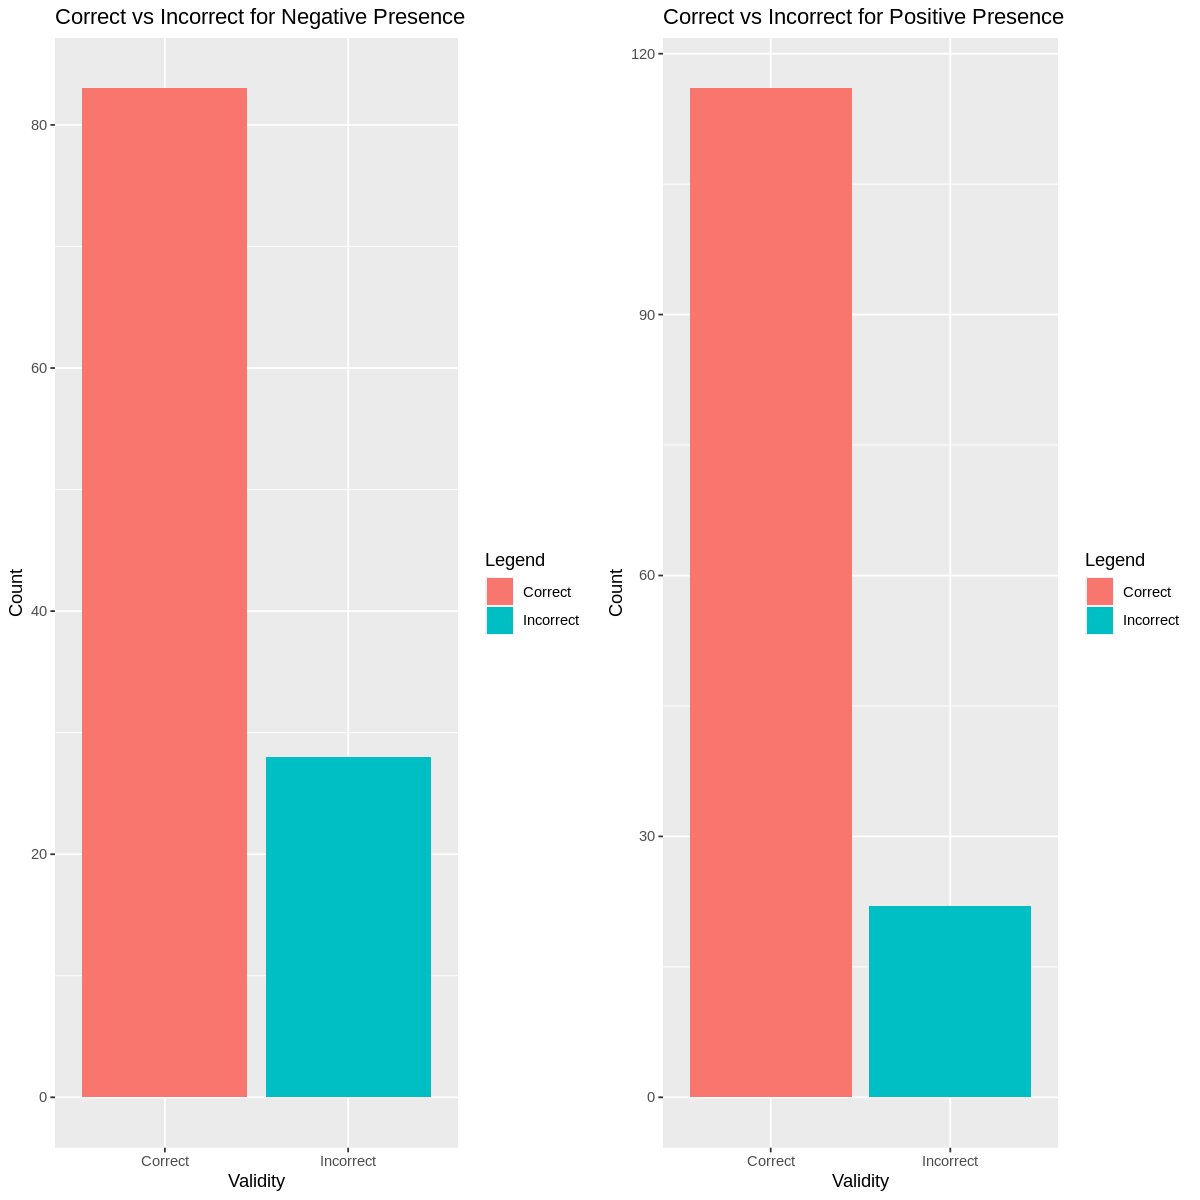

In [23]:
options(repr.plot.width = 10, repr.plot.height = 10)
set.seed(1234)

measurement_func <- function(df) {
    validity_N <- c()
    index_N <- c()
    validity_P <- c()
    index_P <- c()
    for(i in 1:nrow(df)) {
        if((slice(df['Presence_of_Heart_Disease'], i) == "N")) {
            if(slice(df['.pred_class'], i) == "N") {
                validity_N <- c(validity_N, "Correct")
                index_N <- c(index_N, (length(index_N)+1))
            } else {
                validity_N <- c(validity_N, "Incorrect")
                index_N <- c(index_N, (length(index_N)+1))
            }
        } else {
            if(slice(df['.pred_class'], i) == "P") {
                validity_P <- c(validity_P, "Correct")
                index_P <- c(index_P, (length(index_P)+1))
            } else {
                validity_P <- c(validity_P, "Incorrect")
                index_P <- c(index_P, (length(index_P)+1))
            }
        }
    }
    return(list("df1" = data.frame(index_N, validity_N), "df2" = data.frame(index_P, validity_P)))
}

data <- measurement_func(heart_predictions)

graphN <- ggplot(data$df1, aes(x = validity_N, fill = validity_N)) + geom_bar() + labs(x = "Validity", y = "Count", fill = "Legend") + ggtitle("Correct vs Incorrect for Negative Presence")


graphP <- ggplot(data$df2, aes(x = validity_P, fill= validity_P)) + geom_bar() + labs(x = "Validity", y = "Count", fill = "Legend") + ggtitle("Correct vs Incorrect for Positive Presence")


plot_grid(graphN, graphP)

**Breakdown of Visualization**

The above graphs each represent a different type of classification. The graph on the left are all the Negative classifications from the Presence_of_heart_Disease column and the right graph represents all the Positive classifications. The plotted value on the x-axis are the two validity outcomes: correctly predicted and incorrectly predicted. They are measured using the y-axis of count meaning how many correctly and how many incorrectly predicted outcomes. The left graph plots the number of correct and incorrect negative predictions: if the model predicts "N" and the actual result is "N" and when the model predicts "P" and the actual result is "N" respectively. The right graph is the same with positive predictions: if the model predicts "P" and the actual result is "P" results in one correct outcome and if the model predicts 'N" and the actualy result is "P" results in one incorrect outcome. 

We decided to graph the negative vs positive results seperately due to the fact that in this data analysis field, medical diagnosis, predicting correct results when the diagnosis is postivie is much more important than predicting correct results when the diagnosis is negative. It is important to seperate the data to see clearly how well our analysis model is doing on each result. The graphs produced make it quite clear that our model works much better when predicting positive results then when predicting negative results which is a good thing. When the actual result was positive, our model predicted 116 counts correctly and only 22 counts incorrectly resulting in a accuracy of around 85%. When comparing to predicting negative results, we had our model predict 83 correct results and 28 incorrect results which means for negative diagnosis', we had an accuracy of 75%. 

This is great seeing as we have 10% more accurate positive predictions and that is a huge difference since predicting wrong on a negative diagnosis results in a check-up and possible spending of money, but no mortal or fatal outcomes. Whereas if we predict wrong on a positive diagnosis, the patient would not recieve follow-up treatment which could result in disastrous outcomes and terrible medical hinderences. 

Despite the fact that our model performs better on positive diagnosis' when compared to negative, it is still not completely accurate when predicting heart disease. Further follow up from a docter is required if in some case our model is used in the medical field as a early warning for heart disease. When doing classification in the medical field, it is important to have as high of an accuracy as possible, nearing 100%, in order to ensure proper treatment is distributed and the right medical personel are contacted.